In [1]:
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from PIL import Image 
import json  
import mpl_toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
import itertools
from PIL import Image
import sklearn as sklearn
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import model_selection
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import initializers, layers, models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import callbacks
from keras.utils.vis_utils import plot_model
%matplotlib inline


from skimage.feature import hog
from skimage import data, color, exposure

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def plotOne(arr):
    """
    Plot one numpy array
    """
    plt.subplot(1,1,1)
    plt.imshow(arr)


In [3]:
# import the necessary packages
import pyimagesearch.imutils as imutils
from pyimagesearch.helpers import pyramid
from pyimagesearch.helpers import sliding_window
import argparse
import time
import cv2

In [6]:
image = cv2.imread('shipsnet_data/scenes/lb_1.jpg')

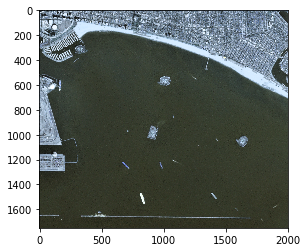

In [8]:
plotOne(image)

In [9]:
(winW, winH) = (80, 80)

windows = []
for (x, y, window) in sliding_window(image, stepSize=20, windowSize=(winW, winH)):
    if window.shape[0] != winH or window.shape[1] != winW:
        continue
    windows.append(window)
    
        

In [11]:
len(windows)

8148

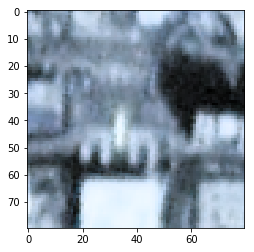

In [119]:
plotOne(windows[100])

In [120]:
import pickle

clf = pickle.load(open('model.pkl','rb'))

In [121]:
def make_vector(image_list):
    vectors = []
    for image in image_list:
        vector = np.ravel(image)
        vectors.append(vector)
    return vectors

In [122]:
x_image = make_vector(windows)

In [123]:
y_pred = clf.predict(x_image)

In [124]:
d = {'vector': x_image, 'predicted': y_pred}
df = pd.DataFrame(data = d)

In [125]:
found_boats = df[df['predicted']==1]

In [126]:
found_boats

,predicted,vector
2,1,"[110, 131, 148, 140, 157, 182, 126, 143, 166, ..."
35,1,"[89, 101, 123, 85, 98, 119, 95, 109, 133, 109,..."
92,1,"[159, 177, 201, 101, 119, 132, 77, 91, 104, 10..."
189,1,"[123, 139, 152, 97, 116, 129, 91, 113, 130, 91..."
229,1,"[101, 119, 134, 109, 125, 143, 126, 140, 162, ..."
231,1,"[90, 101, 112, 60, 73, 83, 77, 90, 105, 128, 1..."
286,1,"[75, 93, 105, 46, 59, 66, 64, 77, 91, 63, 83, ..."
489,1,"[214, 236, 255, 226, 241, 255, 236, 245, 255, ..."
490,1,"[228, 244, 255, 227, 243, 255, 229, 244, 255, ..."
520,1,"[109, 131, 157, 122, 143, 168, 141, 159, 181, ..."


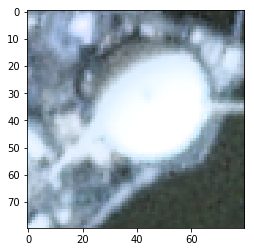

In [133]:
plotOne(windows[2816])

In [45]:
found_boats.loc[7780]

image        [46, 56, 39, 44, 54, 37, 43, 53, 37, 59, 66, 5...
predicted                                                    1
Name: 7780, dtype: object

In [39]:
def plotMany(data): 
    """
    Plot a bunch of numpy arrays sorted by label
    """
    i = 1
    for row in range(11):
        plt.figure(figsize=(5, 15))
        for col in range(2):
            plt.subplot(5,2,i)
            plt.imshow(data[i-1])
            plt.axis('off') 
            i+=1

In [57]:
boat_windows = []
for i in list(found_boats.index):
    boat_windows.append(windows[i])